In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from skimage import data, draw, io
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.transform import warp_polar, rotate, rescale
from skimage.filters import sobel
from matplotlib import cm
import healpy
import rawpy
import imageio
from PIL import Image

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


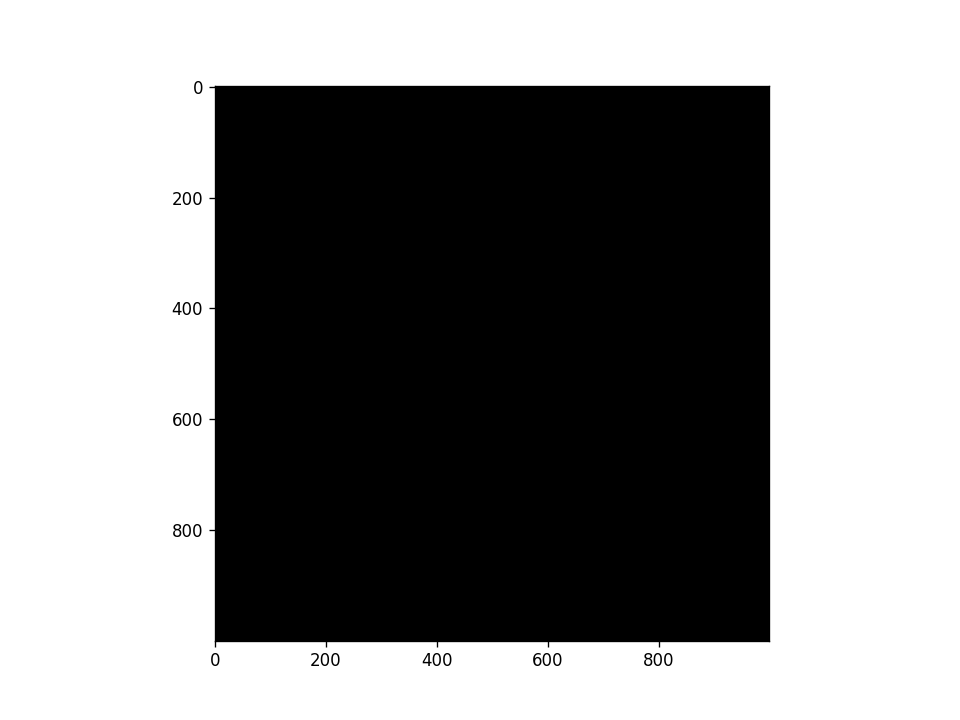

In [12]:
#Creating a Black background
A1 = np.zeros([1000,1000])
print(A1)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(A1,cmap='gray')

<IPython.core.display.Javascript object>


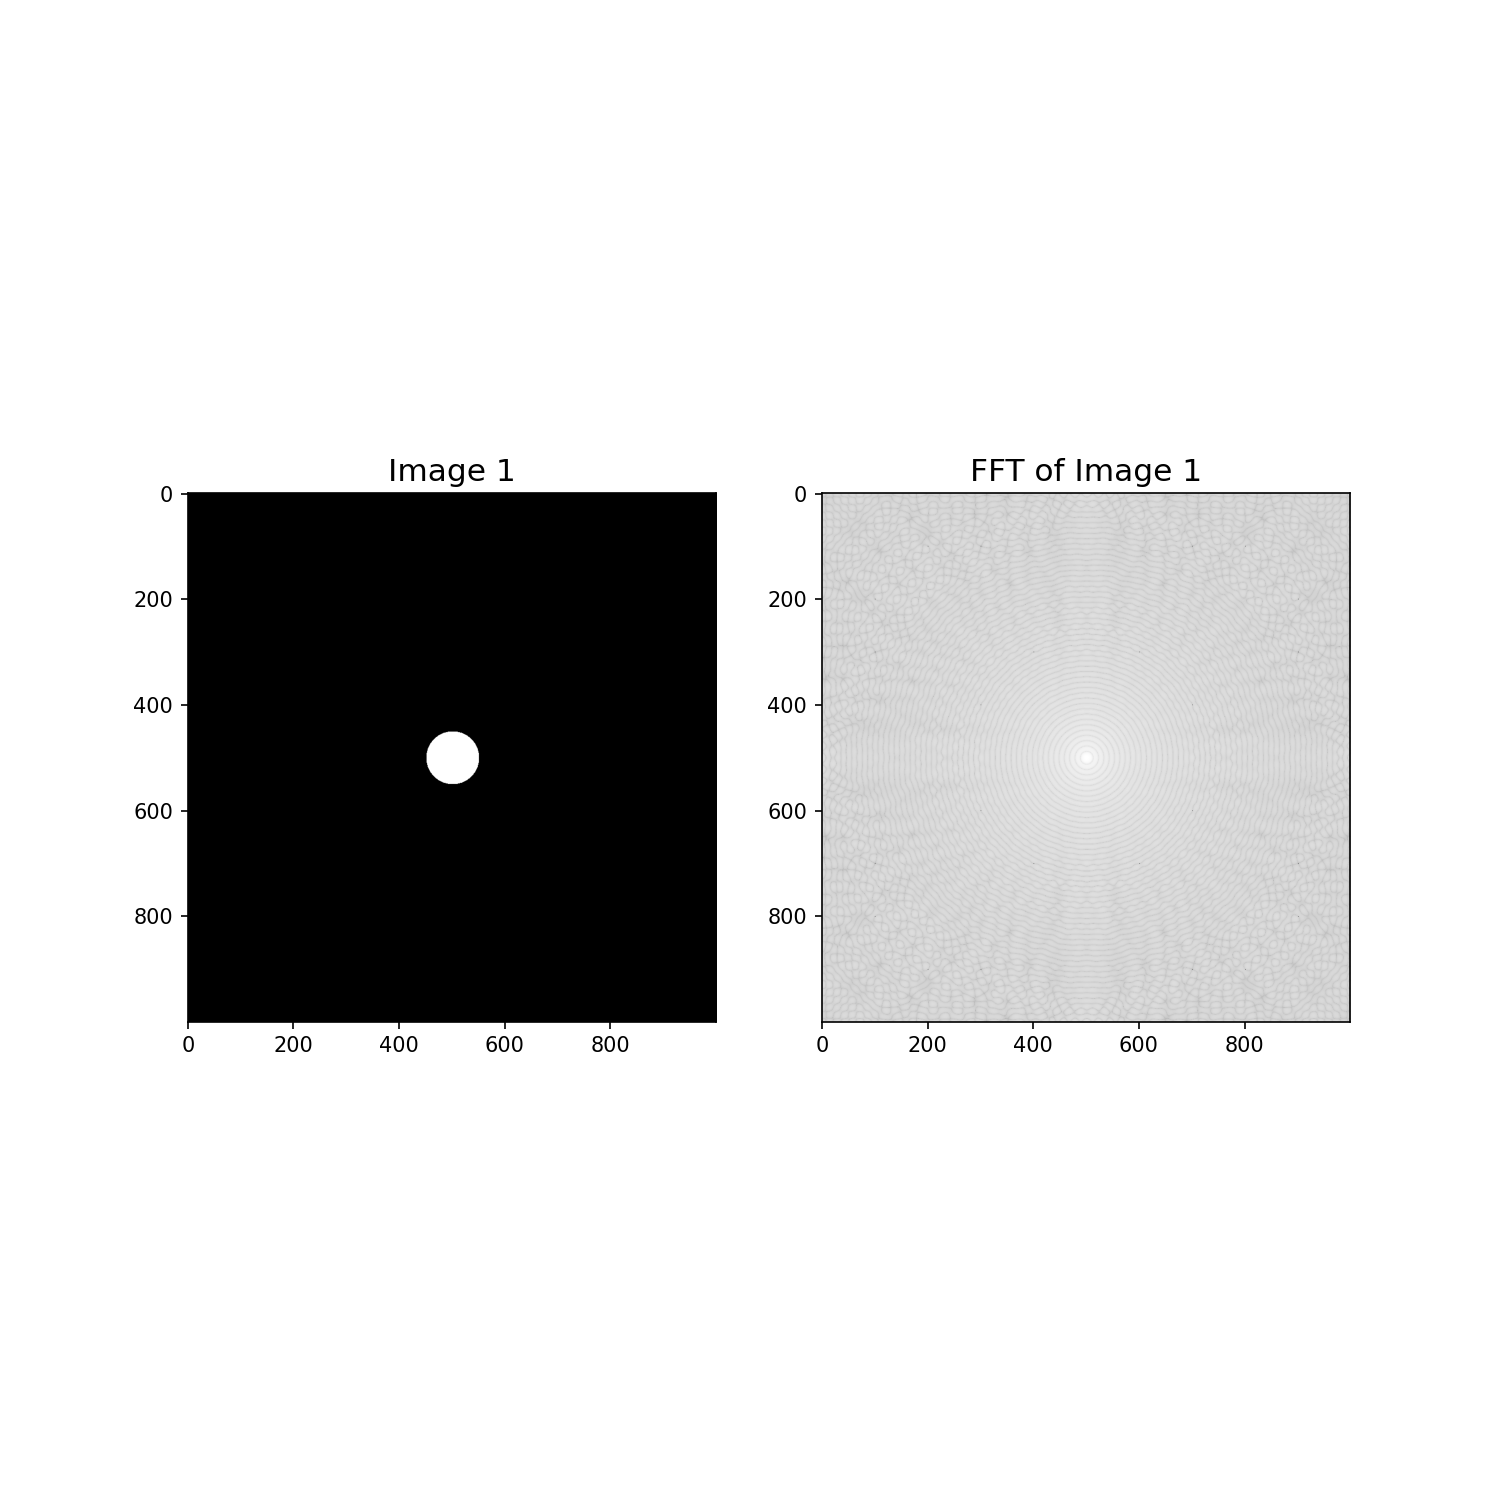

In [16]:
A1 = np.zeros([1000,1000])
row1, col1 = draw.disk((500,500), 50)
A1[row1, col1] = 1
A1_fourier = np.fft.fftshift(np.fft.fft2(A1))
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(A1,cmap='gray')
ax[0].set_title('Image 1', fontsize = 15)
ax[1].set_title('FFT of Image 1',fontsize=15)
ax[1].imshow(np.log(abs(A1_fourier)),cmap='gray')

#This is first image

<IPython.core.display.Javascript object>


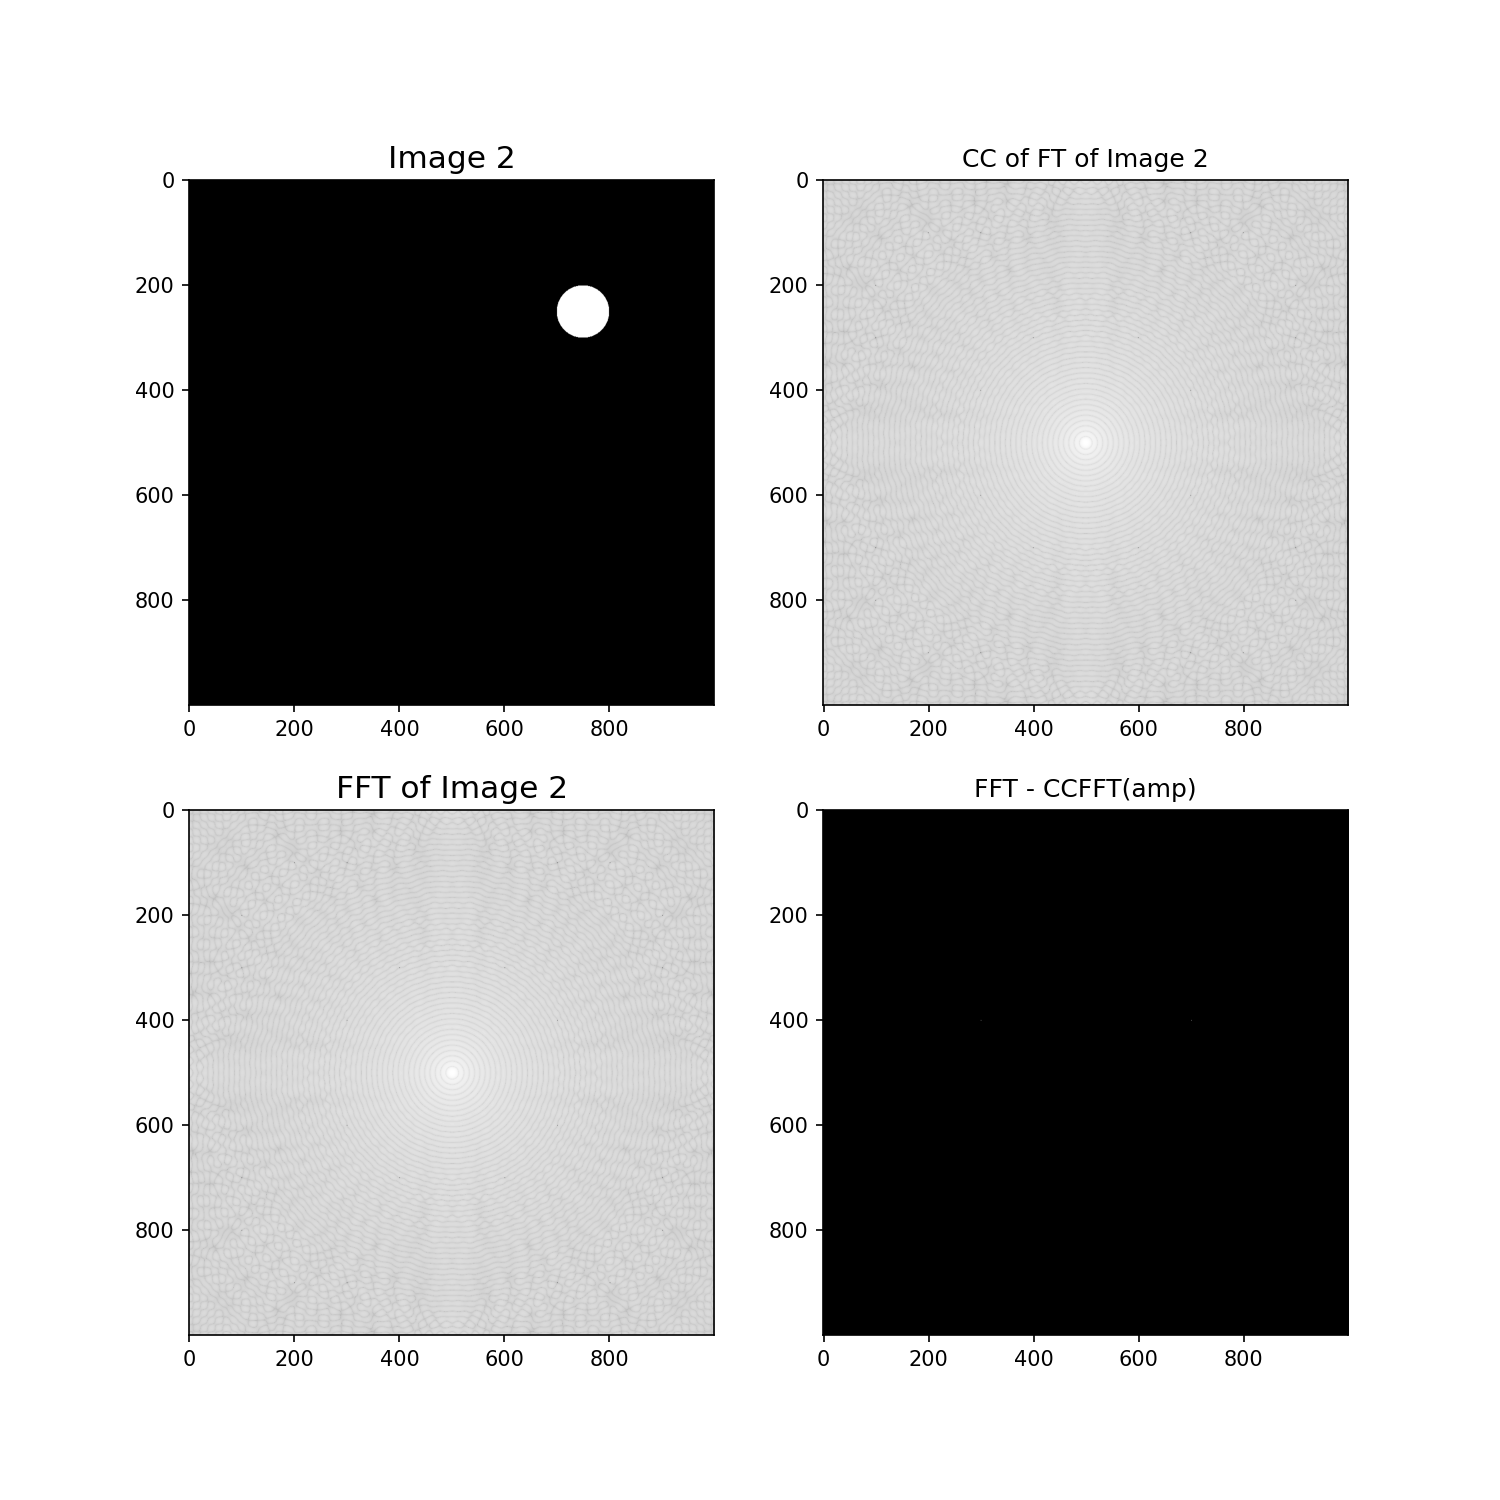

In [17]:
A2 = np.zeros([1000,1000])
row2, col2 = draw.disk((250,750), 50)
A2[row2,col2]=1
A2_fourier = np.fft.fftshift(np.fft.fft2(A2))

A2_amp = np.abs(A2_fourier)
A2_phase = np.angle(A2_fourier)
#Creating a Complex Conjugate
A2_cc = A2_amp*np.exp(-1j*A2_phase)
diff = np.abs(A2_fourier) - np.abs(A2_cc)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(A2,cmap='gray')
ax[0,0].set_title('Image 2', fontsize = 15)
ax[1,0].set_title('FFT of Image 2',fontsize=15)
ax[1,0].imshow(np.log(np.abs(A2_fourier)),cmap='gray')
ax[0,1].set_title('CC of FT of Image 2')
ax[0,1].imshow(np.log(np.abs(A2_cc)),cmap='gray')
ax[1,1].set_title('FFT - CCFFT(amp)')
ax[1,1].imshow(diff,cmap='gray')


## Finally making some phase correlation plots

1.0000000000000002
(array([250]), array([750]))
[[4.37568364e-20 2.38643055e-20 2.39587143e-20 ... 6.39473141e-20
  6.36070563e-20 4.24387158e-20]
 [7.60394088e-20 9.47029489e-20 5.74557562e-20 ... 3.04898328e-20
  1.15875239e-19 1.01626884e-19]
 [3.73861108e-20 9.66691282e-20 6.19984553e-20 ... 7.28954742e-20
  9.03312525e-20 7.67383090e-20]
 ...
 [3.21731613e-20 9.49783555e-20 2.98706695e-20 ... 1.36949891e-19
  9.78158325e-20 6.66408031e-20]
 [9.88966037e-20 5.90049089e-20 1.33741631e-19 ... 1.48603444e-19
  5.40659789e-20 5.45248791e-20]
 [6.26808221e-20 1.34425943e-20 1.75141026e-20 ... 1.67578156e-19
  2.66291859e-20 1.04517668e-19]]


<IPython.core.display.Javascript object>


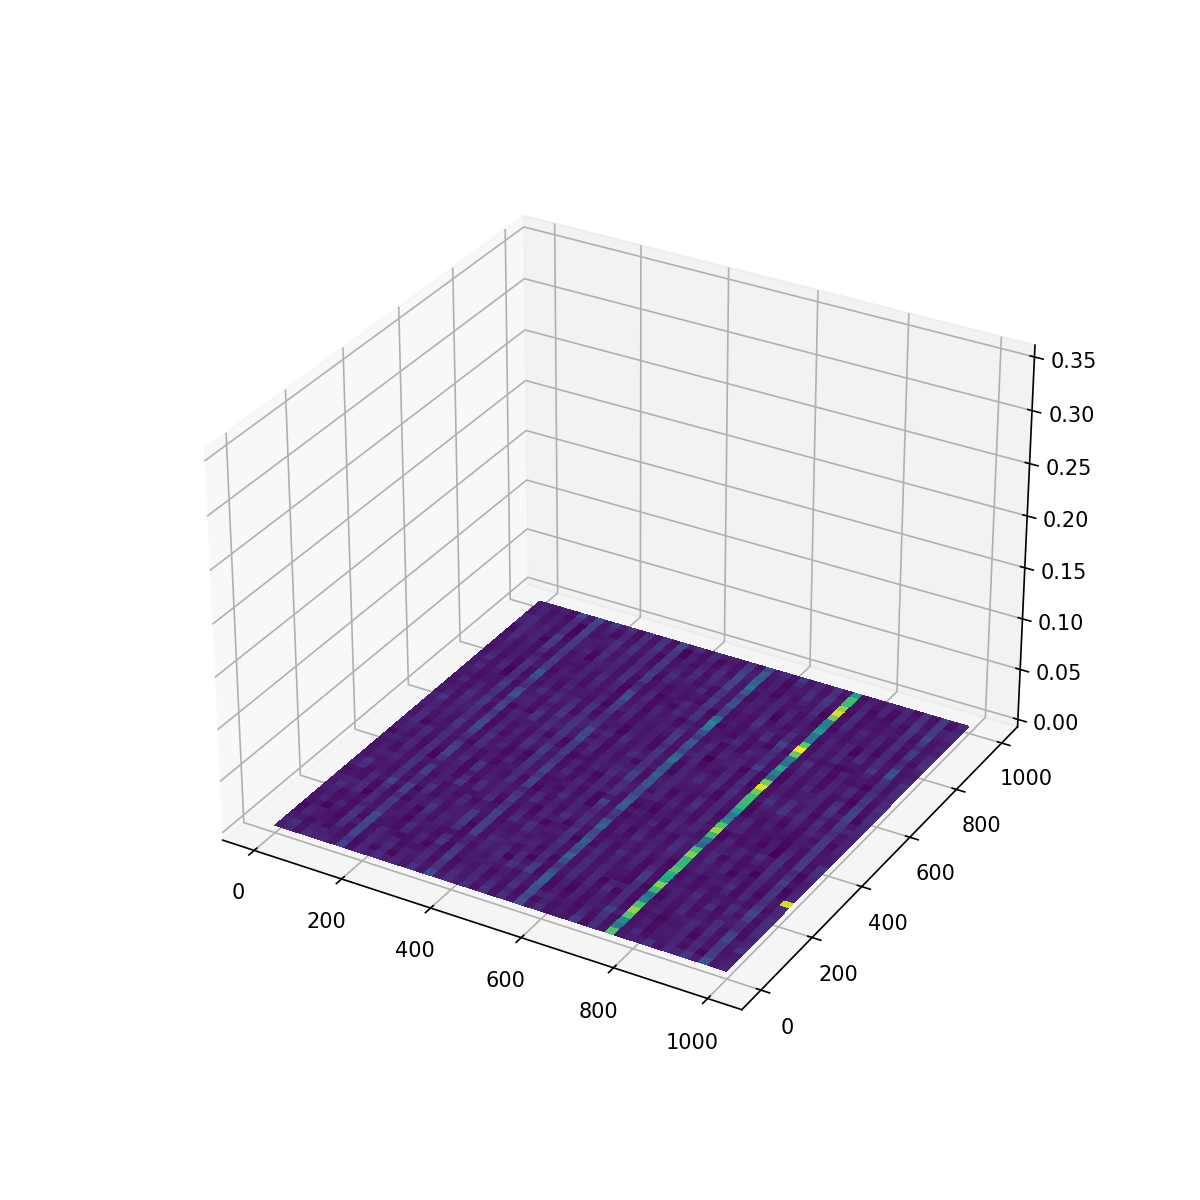

In [19]:
C_fourier = A1_fourier*A2_cc
C_norm = (C_fourier)/(np.abs(A1_fourier*A2_fourier))
C = np.fft.ifft2(C_norm)
#plt.figure(num=None, figsize=(8, 8), dpi=80)
#plt.imshow(np.abs(C),cmap='gray')
print(np.max(np.abs(C)))
print(np.where(np.abs(C) == np.max(np.abs(C))))
print(np.abs(C))

elevation_map = sobel(np.abs(C))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

m, n=elevation_map.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, elevation_map, cmap=cm.viridis, antialiased=False)
ax.axis("on")
#ax.set_facecolor('black')
plt.show()



In [20]:
print(np.abs(C)[0:253,750])

[3.87366535e-18 1.26915237e-18 1.47370741e-17 1.23755797e-18
 1.88596063e-18 4.55330775e-19 5.83912677e-18 1.01633611e-18
 1.89405977e-18 1.38848510e-18 1.89404878e-17 2.25077455e-18
 2.24143004e-18 1.59381607e-18 7.63648981e-18 1.08716014e-18
 4.94595463e-18 2.36541597e-18 1.04076535e-17 2.67046634e-18
 1.43515729e-19 2.08127309e-18 3.75868481e-18 1.15735574e-18
 1.22543726e-19 3.85156808e-18 3.69686082e-18 1.56618411e-18
 2.35031666e-18 2.44332640e-18 5.71152583e-18 7.54801526e-19
 6.27760258e-18 9.19490918e-20 5.34530452e-18 8.46885434e-19
 2.30239711e-18 2.31427156e-18 9.57849150e-19 1.72798651e-18
 1.28221041e-18 1.53864521e-18 1.18307050e-17 1.68100374e-18
 6.27929172e-19 1.79716038e-18 3.02658749e-18 1.21888952e-18
 1.17396284e-18 1.88625648e-18 2.69788516e-17 9.91260682e-19
 1.59697139e-18 1.33843254e-18 1.96349182e-18 1.09509049e-18
 1.66908547e-18 1.92164085e-18 3.22931292e-18 1.02259838e-18
 2.85082057e-18 1.38346398e-18 6.05583776e-18 1.44799846e-18
 1.72225321e-18 8.858711

## Learning till now from : 
## [For more on Sobel etc.](https://scikit-image.org/docs/stable/user_guide/tutorial_segmentation.html) 
## [drawing and filling shapes, has perimeter draws also](https://coderzcolumn.com/tutorials/python/how-to-draw-shapes-on-images-using-scikit-image-python) 
## [np.abs and np.angle and other Fourier Transforms](https://numpy.org/doc/stable/reference/routines.fft.html)
## [The best article on visualisation](https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b)



## Limiting the Exposure in the Best images. 
## Concept : $C^{\gamma}$, then the exposure reduces.

In [9]:
path = 'DSC_4002.NEF'
with rawpy.imread(path) as raw:
    rgb = raw.postprocess()
imageio.imsave('DSC_4002.tiff', rgb)

<IPython.core.display.Javascript object>


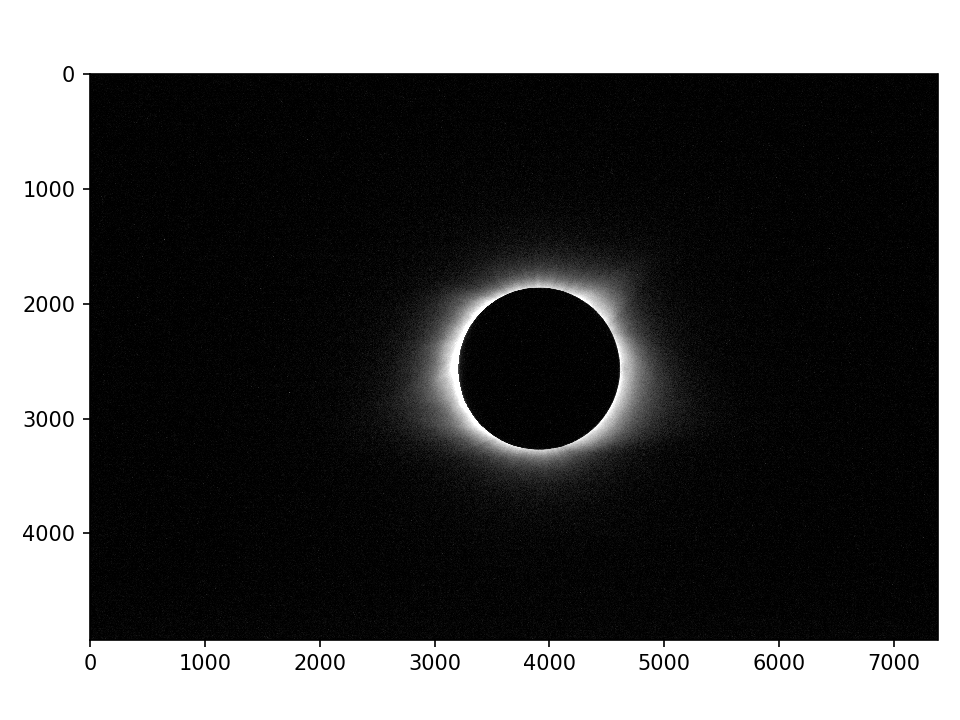

In [10]:
DSC_4002 = imread(fname="DSC_4002.tiff")
DSC_4002_gray = color.rgb2gray(DSC_4002)
imshow(DSC_4002_gray,cmap='gray')

In [11]:
DSC_4002_n = (DSC_4002_gray)
np.max(DSC_4002_n)

1.0

<IPython.core.display.Javascript object>


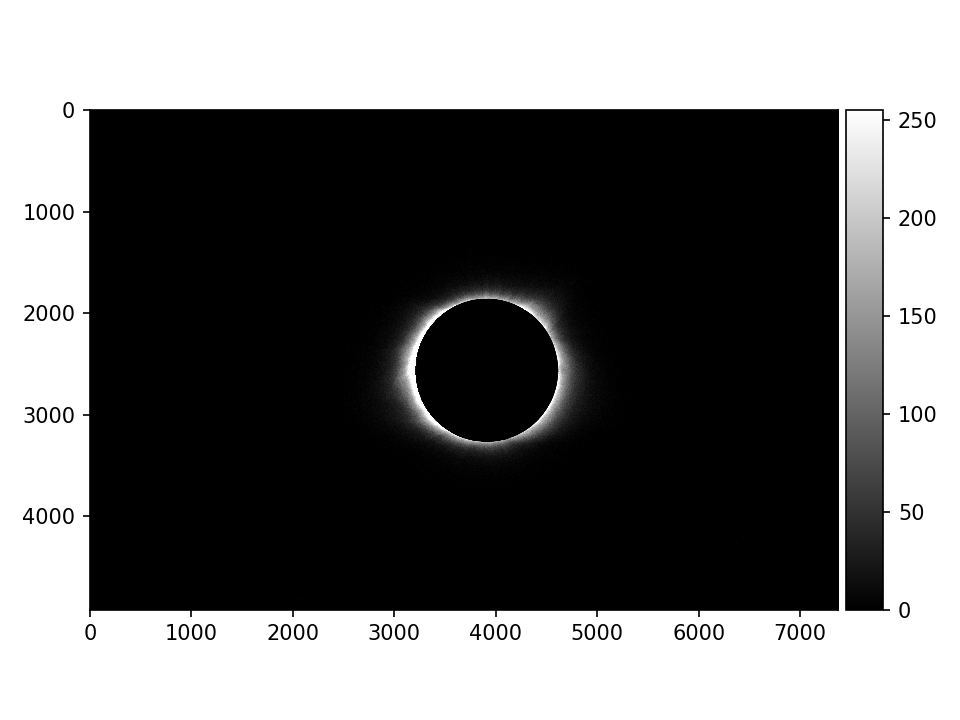

In [16]:
DSC_4002_n_p = ((DSC_4002_n)**(2))*255
np.shape(DSC_4002_n_p)
imshow(np.abs(DSC_4002_n_p),cmap='gray')

In [4]:
path = 'DSC_4016.NEF'
with rawpy.imread(path) as raw:
    rgb = raw.postprocess()
imageio.imsave('DSC_4016.tiff', rgb)

<IPython.core.display.Javascript object>


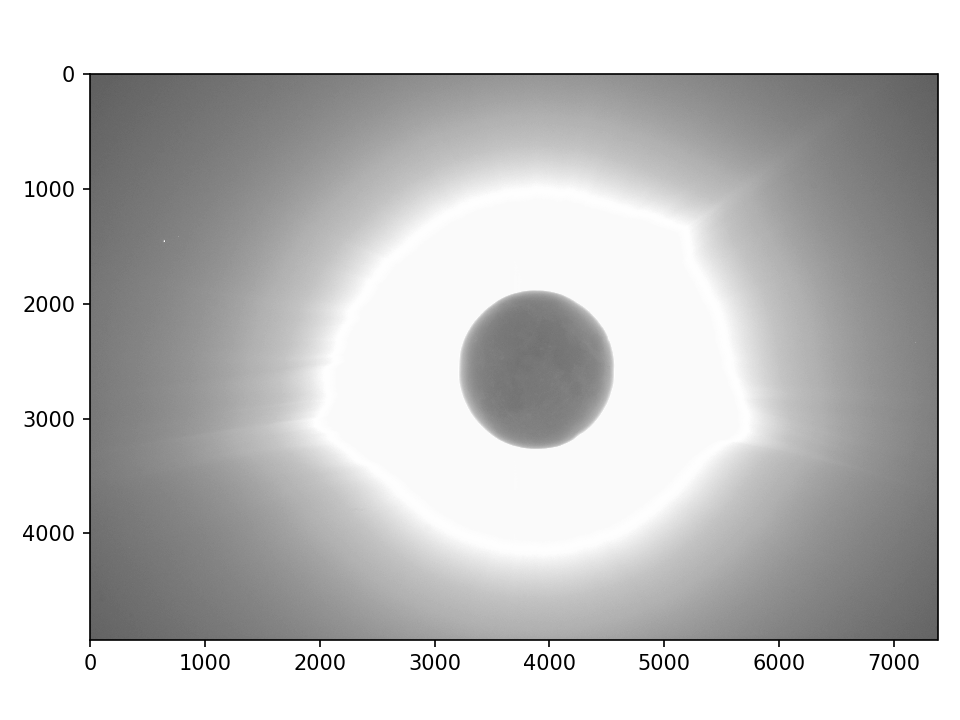

In [24]:
DSC_4016 = imread(fname="DSC_4016.tiff")
DSC_4016_gray = color.rgb2gray(DSC_4016)
imshow(np.abs(DSC_4016_gray),cmap='gray')

In [25]:
DSC_4016_n = (DSC_4016_gray)
np.max(DSC_4016_n)

0.9954760784313726

In [39]:
DSC_4016_n_4 = (DSC_4016_n)**(2)

In [40]:
np.shape(DSC_4016_n_4)

(4924, 7378)

In [41]:
np.max(DSC_4016_n_4)

0.9909726227291044

In [42]:
DSC_4016_n_4_gray = DSC_4016_n_4

<IPython.core.display.Javascript object>


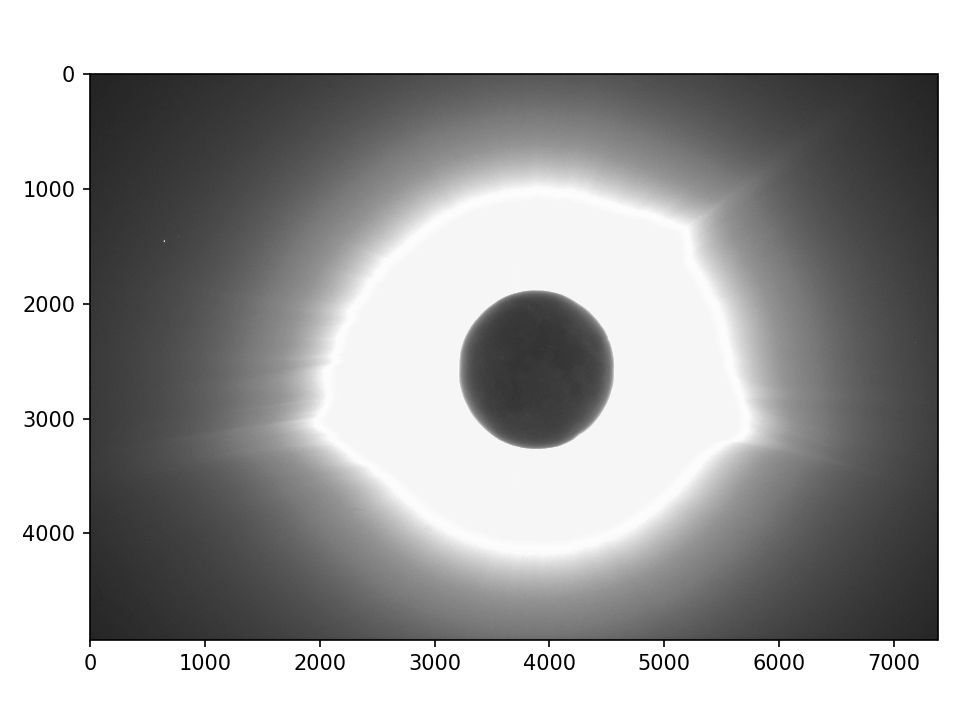

In [43]:
imshow(np.abs(DSC_4016_n_4_gray),cmap='gray')

<IPython.core.display.Javascript object>


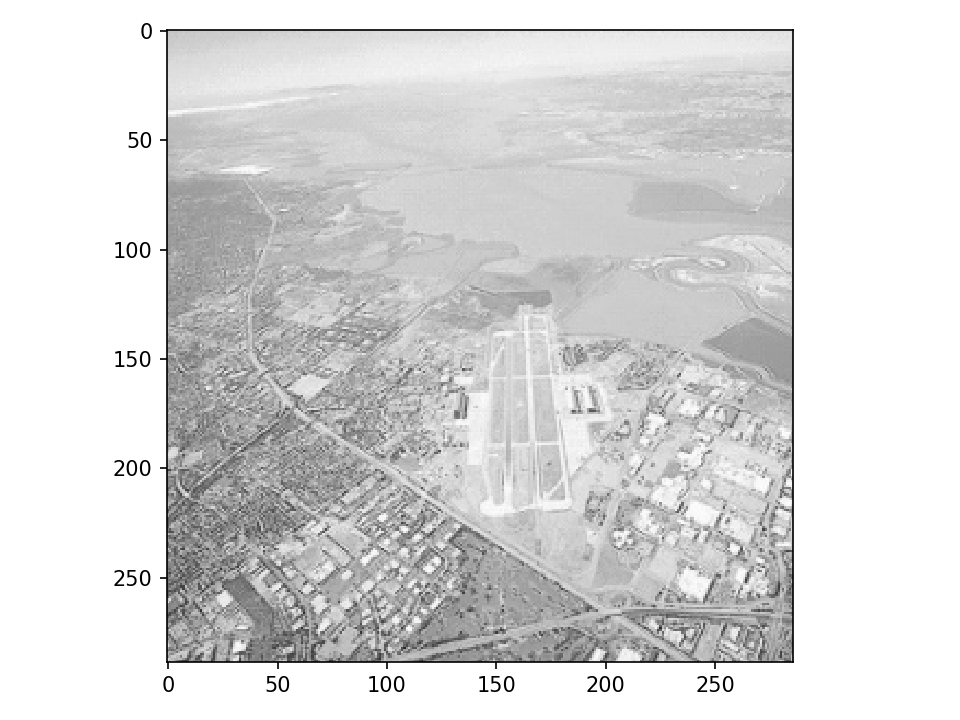

In [2]:
exposure_image = Image.open('exposure_image.png').convert('L')

np.shape(exposure_image)
#exposure_image_gray = color.rgb2gray(exposure_image)
imshow(np.abs(exposure_image),cmap='gray')

In [19]:
exposure_image = np.array(exposure_image)/255
np.max(exposure_image)
exposure_image_p = exposure_image**4
exposure_image_p_g = (exposure_image_p/(np.max(exposure_image_p)))
np.max(exposure_image_p_g)

1.0

<IPython.core.display.Javascript object>


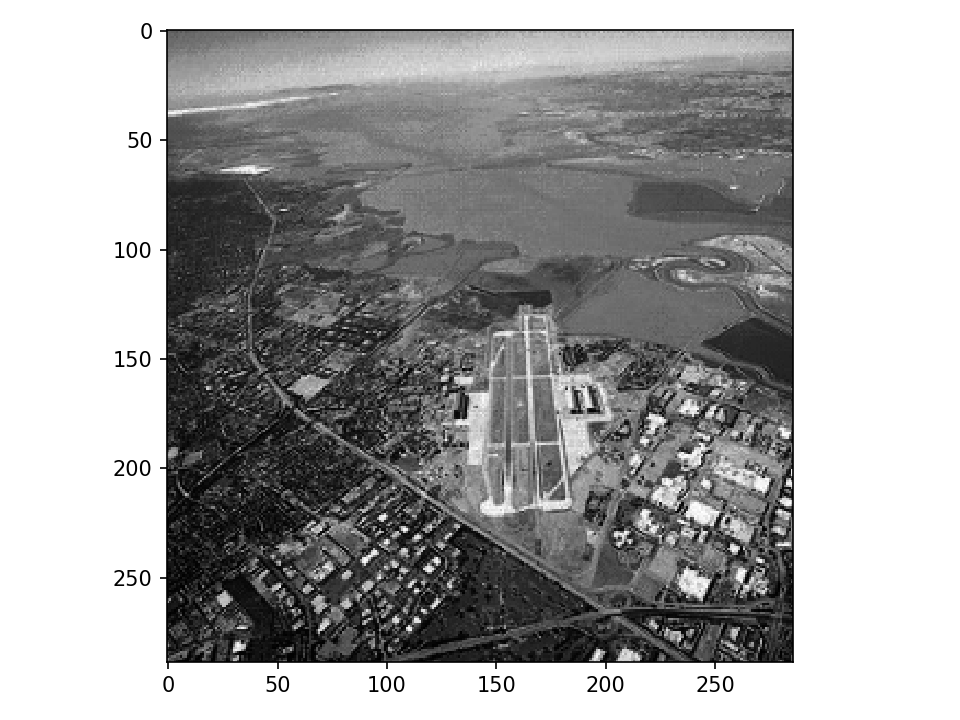

In [20]:
imshow(exposure_image_p_g,cmap='gray')

## Phase correlation method for rotation and scale together

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


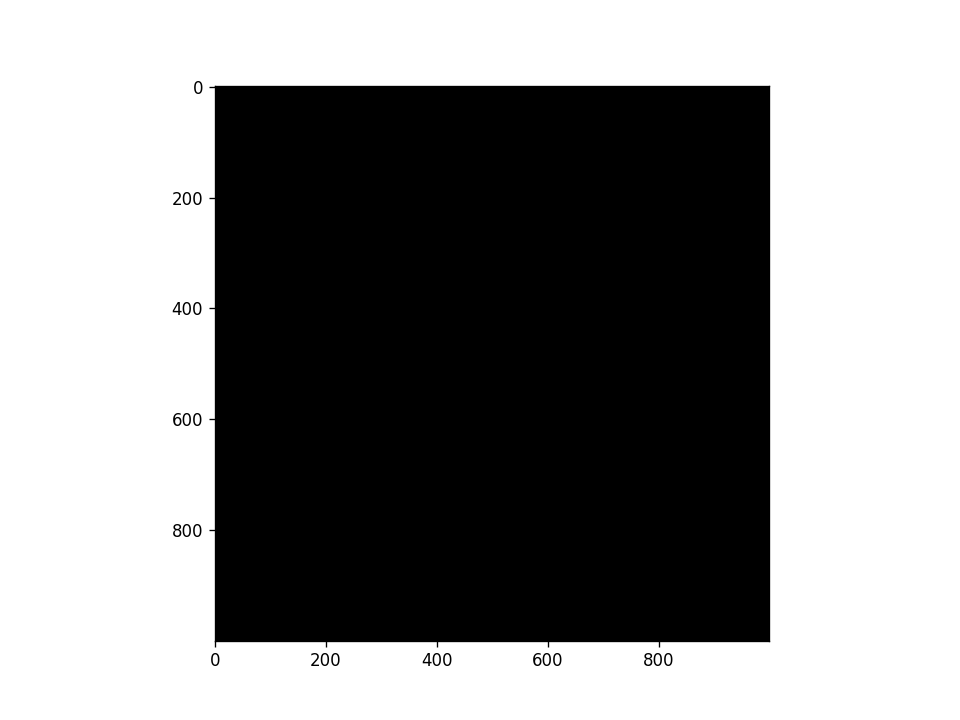

In [21]:
#Creating a Black background
A1 = np.zeros([1000,1000])
print(A1)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(A1,cmap='gray')

<IPython.core.display.Javascript object>


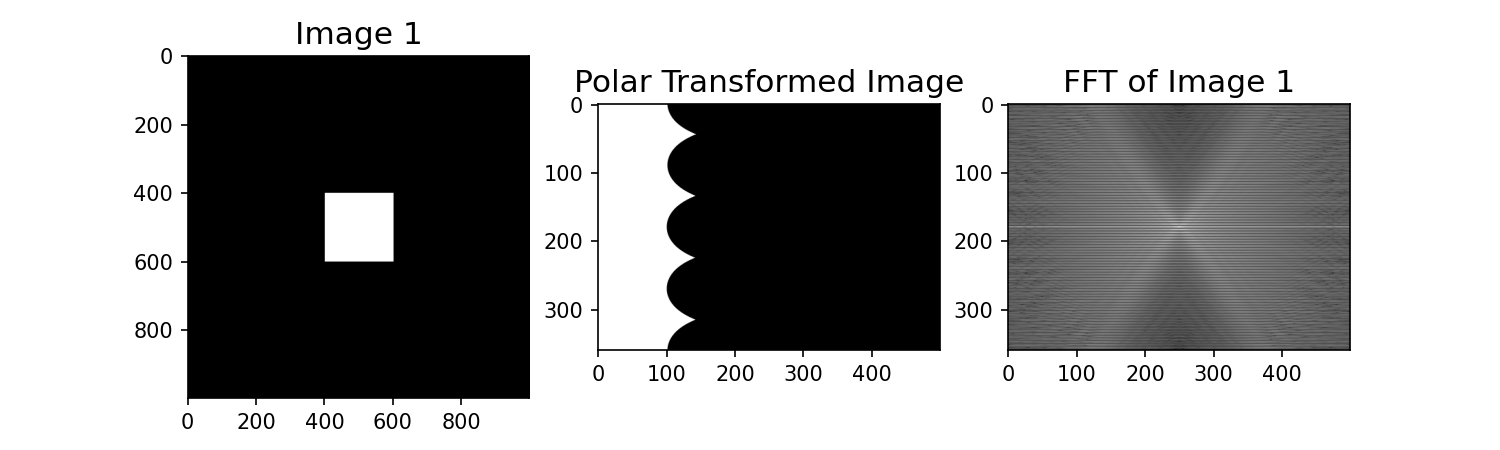

In [5]:
A1 = np.zeros([1000,1000])
row_rect, col_rect = draw.rectangle(start=(400,400), end=(600, 600))
fig, ax = plt.subplots(1,3,figsize=(10,3))
radius = 500
A1[row_rect, col_rect] = 1
A1_polar = warp_polar(A1, radius=radius, channel_axis=None)
A1_fourier = np.fft.fftshift(np.fft.fft2(A1_polar))
A1_amp = np.abs(A1_fourier)
A1_phase = np.angle(A1_fourier)
#Creating a Complex Conjugate
A1_cc = A1_amp*np.exp(-1j*A1_phase)
#plt.imshow(A1,cmap='gray')
ax[0].imshow(A1,cmap='gray')
ax[0].set_title('Image 1', fontsize = 15)
ax[1].imshow(A1_polar,cmap='gray')
ax[1].set_title('Polar Transformed Image', fontsize = 15)
ax[2].set_title('FFT of Image 1',fontsize=15)
ax[2].imshow(np.log(abs(A1_fourier)),cmap='gray')


<IPython.core.display.Javascript object>


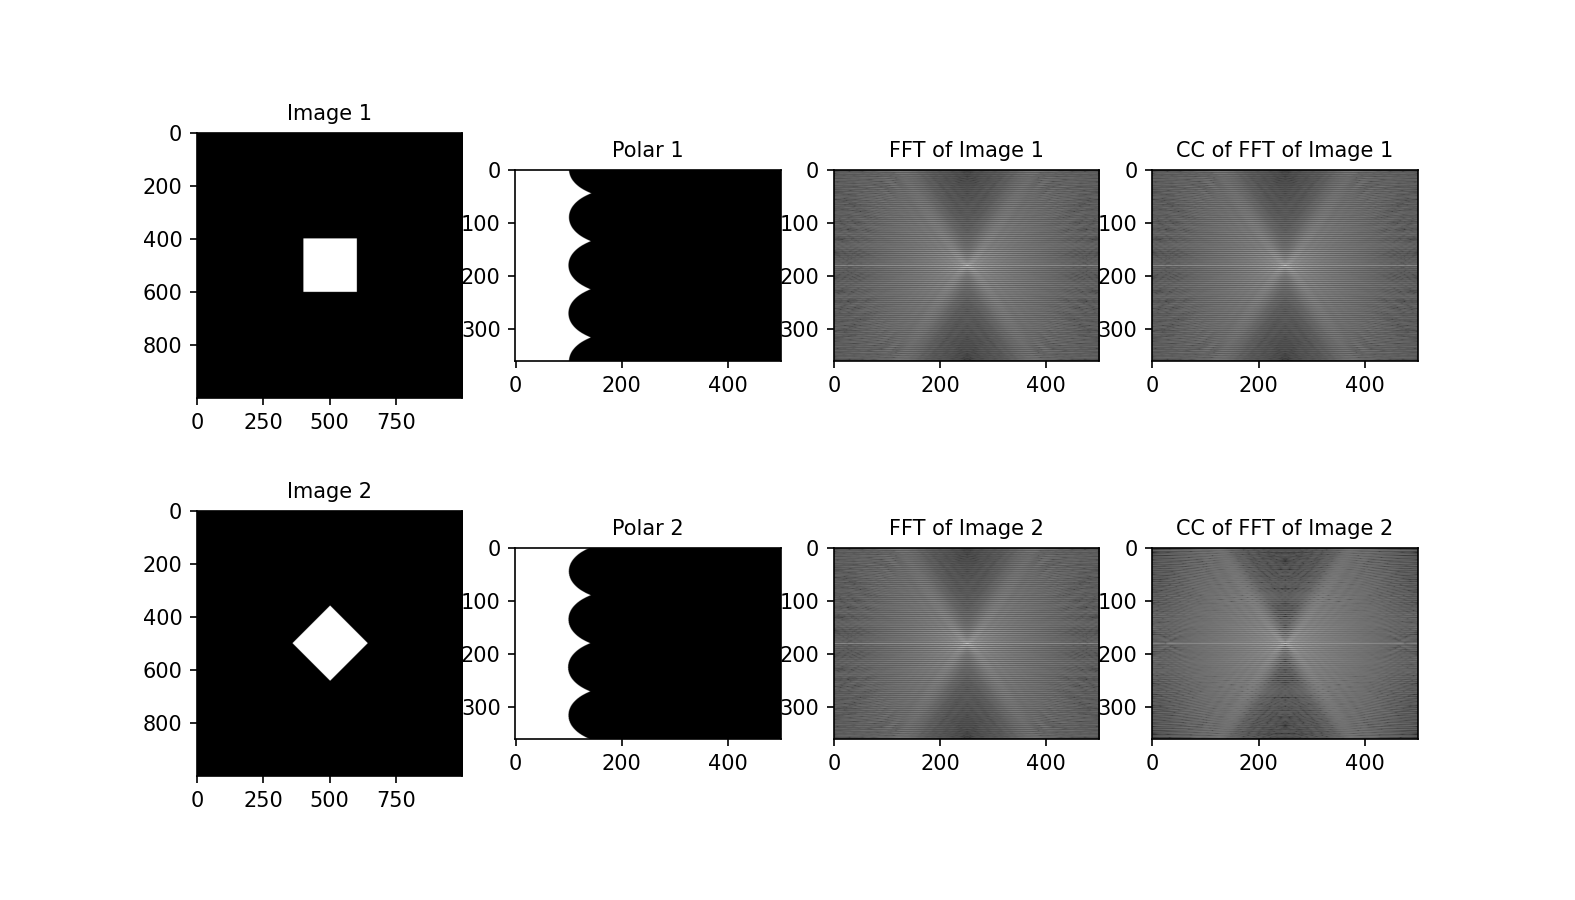

In [8]:
A2 = np.zeros([1000,1000])
row_rot_rect, col_rot_rect = draw.polygon((500,500-(100*np.sqrt(2)),500,500+(100*np.sqrt(2))), (500-(100*np.sqrt(2)),500,500+(100*np.sqrt(2)),500))
A2[row_rot_rect, col_rot_rect] = 1
# plt.imshow(A2,cmap='gray')
fig, ax = plt.subplots(2,4,figsize=(10.5,6))
radius = 500
A2_polar = warp_polar(A2, radius=radius, channel_axis=None)
A2_fourier = np.fft.fftshift(np.fft.fft2(A2_polar))
A2_amp = np.abs(A2_fourier)
A2_phase = np.angle(A2_fourier)
#Creating a Complex Conjugate
A2_cc = A2_amp*np.exp(-1j*A2_phase)
#diff = np.abs(A2_fourier) - np.abs(A2_cc)
#plt.imshow(A1,cmap='gray')
ax[0,0].imshow(A1,cmap='gray')
ax[0,0].set_title('Image 1', fontsize = 10)
ax[0,1].imshow(A1_polar,cmap='gray')
ax[0,1].set_title('Polar 1', fontsize = 10)
ax[0,2].set_title('FFT of Image 1',fontsize=10)
ax[0,2].imshow(np.log(abs(A1_fourier)),cmap='gray')
ax[0,3].set_title('CC of FFT of Image 1',fontsize=10)
ax[0,3].imshow(np.log(abs(A1_cc)),cmap='gray')
ax[1,0].imshow(A2,cmap='gray')
ax[1,0].set_title('Image 2', fontsize = 10)
ax[1,1].imshow(A2_polar,cmap='gray')
ax[1,1].set_title('Polar 2', fontsize = 10)
ax[1,2].set_title('FFT of Image 2',fontsize=10)
ax[1,2].imshow(np.log(abs(A1_fourier)),cmap='gray')
ax[1,3].set_title('CC of FFT of Image 2',fontsize=10)
ax[1,3].imshow(np.log(abs(A2_cc)),cmap='gray')

0.3538857720678813
(array([315]), array([1]))
[[7.68713001e-03 7.81953874e-03 6.73574424e-03 ... 4.07931879e-03
  5.76290947e-03 6.72149078e-03]
 [7.90238296e-03 1.00596856e-02 7.44280349e-03 ... 2.31272304e-04
  1.69280941e-03 4.24271120e-03]
 [1.08041291e-04 1.85027221e-03 9.00820384e-04 ... 7.03790024e-04
  1.04692879e-03 4.82412020e-04]
 ...
 [2.46310888e-03 1.13214275e-03 1.62185705e-03 ... 1.97658769e-05
  4.22959244e-03 4.56776120e-03]
 [1.08041291e-04 1.85027221e-03 9.00820384e-04 ... 7.03790024e-04
  1.04692879e-03 4.82412020e-04]
 [7.90238296e-03 1.00596856e-02 7.44280349e-03 ... 2.31272304e-04
  1.69280941e-03 4.24271120e-03]]


<IPython.core.display.Javascript object>


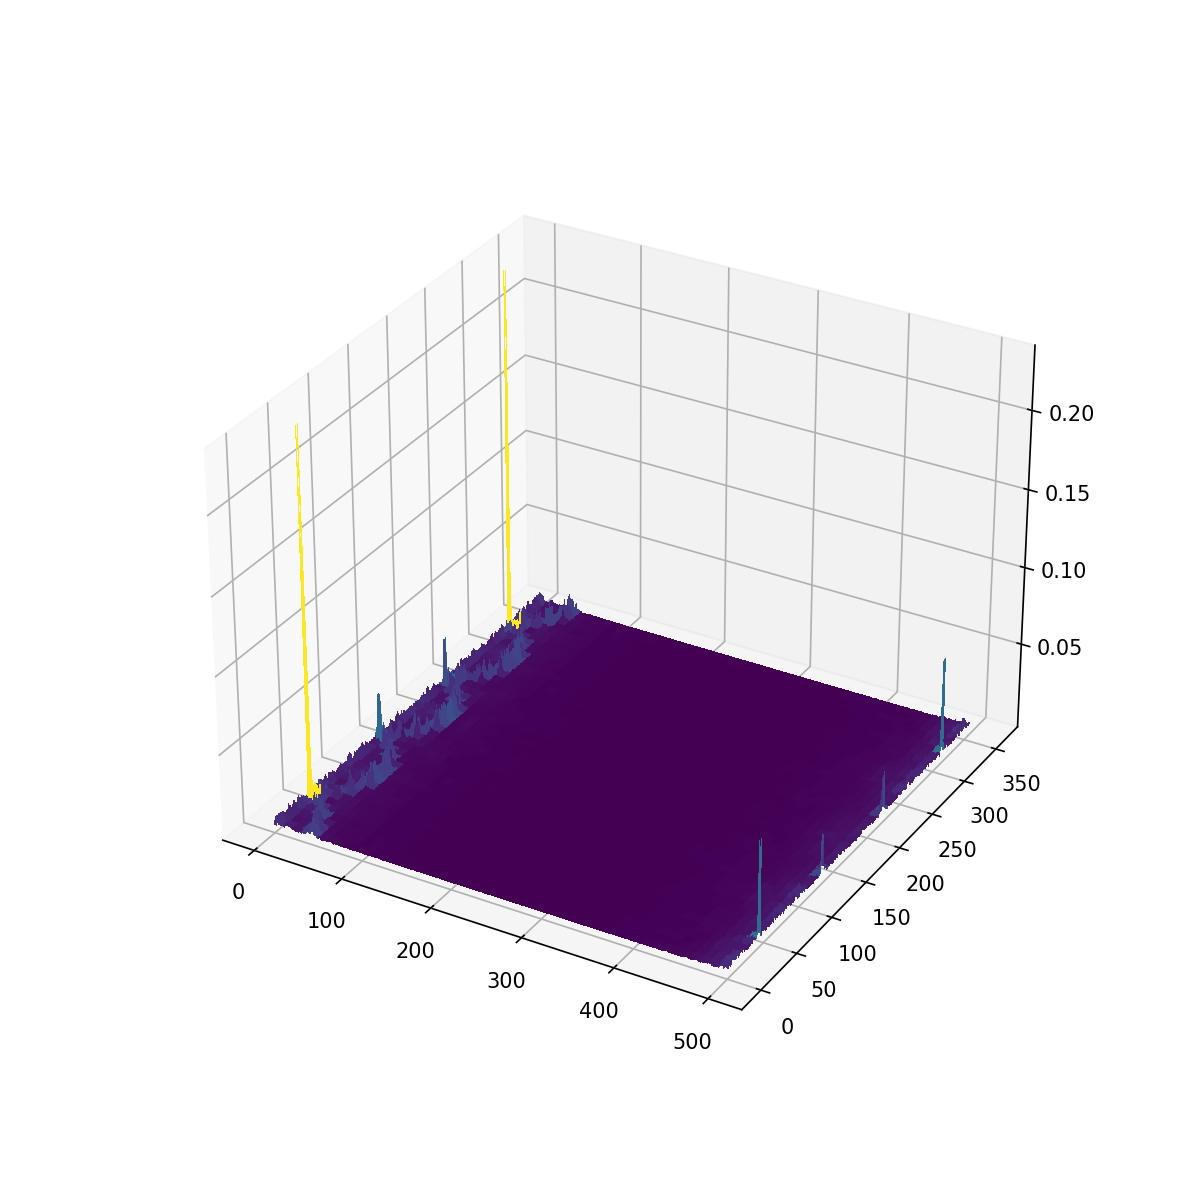

In [9]:
C_fourier = A1_fourier*A2_cc
C_norm = (C_fourier)/(np.abs(A1_fourier*A2_fourier))
C = np.fft.ifft2(C_norm)
#plt.figure(num=None, figsize=(8, 8), dpi=80)
#plt.imshow(np.abs(C),cmap='gray')
print(np.max(np.abs(C)))
print(np.where(np.abs(C) == np.max(np.abs(C))))
print(np.abs(C))

elevation_map = sobel(np.abs(C))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

m, n=elevation_map.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, elevation_map, cmap=cm.viridis, antialiased=False)
ax.axis("on")
#ax.set_facecolor('black')
plt.show()



## But usually the center of rotation isn't known, so resorting to first computing the Fourier transform and then doing things and also will compare for scale now.

<IPython.core.display.Javascript object>


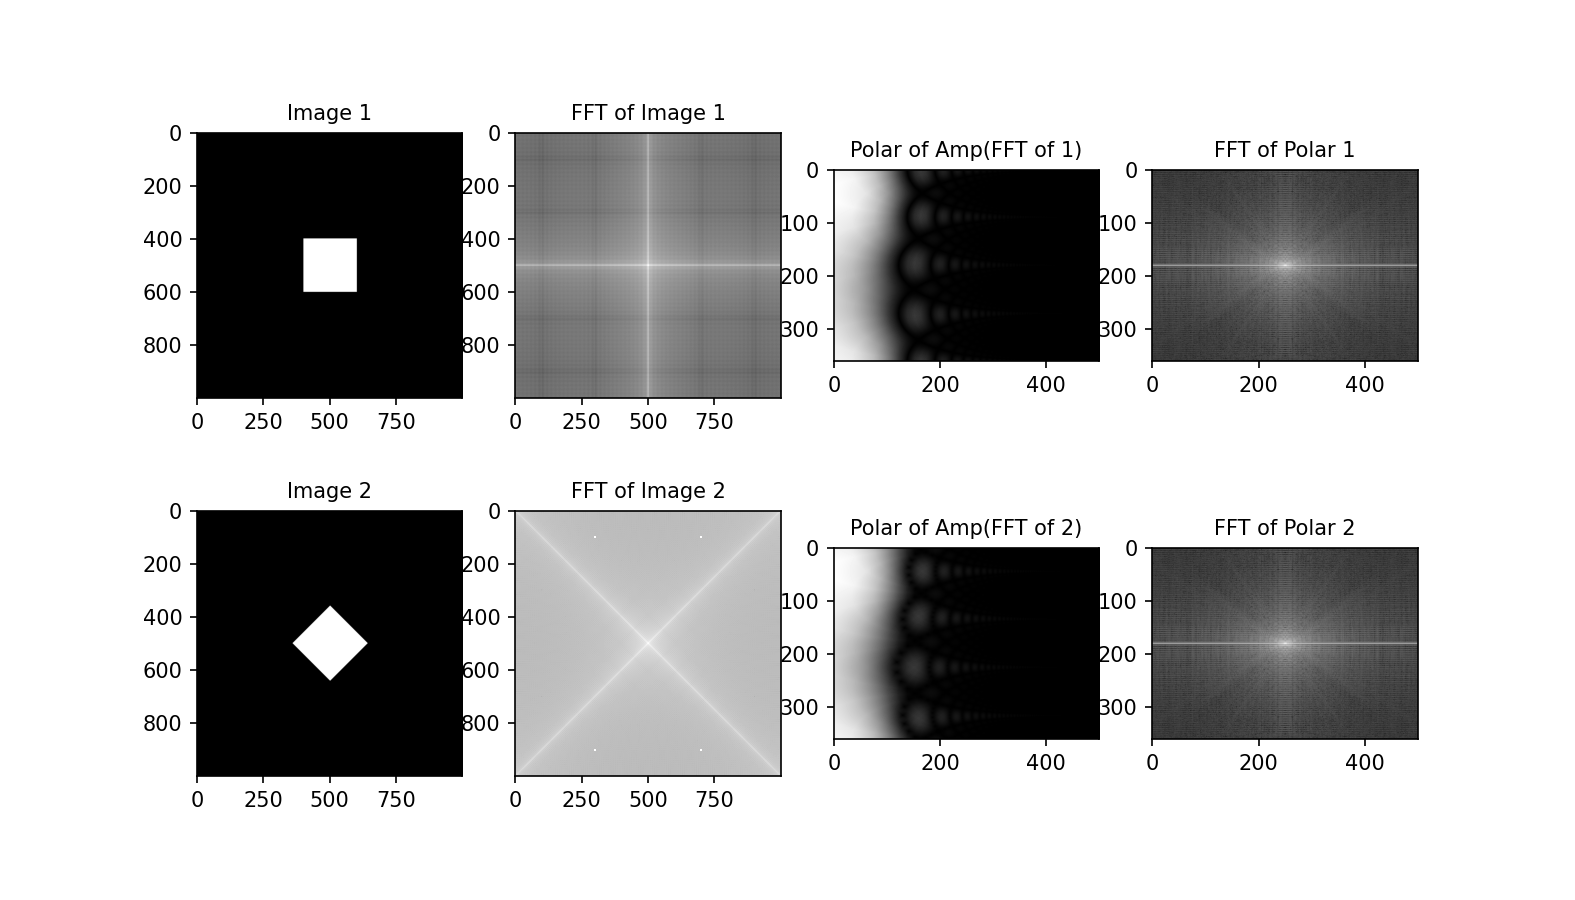

/tmp/ipykernel_946/332004584.py:45: RuntimeWarning: divide by zero encountered in log
  ax[1,1].imshow(np.log(np.abs(A2_fourier)),cmap='gray')


In [54]:
A1 = np.zeros([1000,1000])
row_rect, col_rect = draw.rectangle(start=(400,400), end=(600, 600))
radius = 500
A1[row_rect, col_rect] = 1
A1_fourier = np.fft.fftshift(np.fft.fft2(A1))
A1_F_polar = warp_polar(np.abs(A1_fourier), radius=radius, channel_axis=None,scaling='log')

#Now taking the fourier of the amplitude of the polar of fourier of oiriginal image
A1_F_p_F = np.fft.fftshift(np.fft.fft2(A1_F_polar))
A1_F_p_F_amp = np.abs(A1_F_p_F)
A1_F_p_F_phase = np.angle(A1_F_p_F)
#Creating a Complex Conjugate
A1_F_p_F_cc = A1_F_p_F_amp*np.exp(-1j*A1_F_p_F_phase)

A2 = np.zeros([1000,1000])

row_rot_rect, col_rot_rect = draw.polygon((500,500-(100*np.sqrt(2)),500,500+(100*np.sqrt(2))), (500-(100*np.sqrt(2)),500,500+(100*np.sqrt(2)),500))
A2[row_rot_rect, col_rot_rect] = 1
A2_fourier = np.fft.fftshift(np.fft.fft2(A2))
A2_F_polar = warp_polar(np.abs(A2_fourier), radius=radius, channel_axis=None,scaling='log')

#Now taking the fourier of the amplitude of the polar of fourier of oiriginal image

A2_F_p_F = np.fft.fftshift(np.fft.fft2(A2_F_polar))
A2_F_p_F_amp = np.abs(A2_F_p_F)
A2_F_p_F_phase = np.angle(A2_F_p_F)
#Creating a Complex Conjugate
A2_F_p_F_cc = A2_F_p_F_amp*np.exp(-1j*A2_F_p_F_phase)


fig, ax = plt.subplots(2,4,figsize=(10.5,6))
#diff = np.abs(A2_fourier) - np.abs(A2_cc)
#plt.imshow(A1,cmap='gray')

ax[0,0].imshow(A1,cmap='gray')
ax[0,0].set_title('Image 1', fontsize = 10)
ax[0,1].imshow(np.log(np.abs(A1_fourier)),cmap='gray')
ax[0,1].set_title('FFT of Image 1', fontsize = 10)
ax[0,2].set_title('Polar of Amp(FFT of 1)',fontsize=10)
ax[0,2].imshow(A1_F_polar,cmap='gray')
ax[0,3].set_title('FFT of Polar 1',fontsize=10)
ax[0,3].imshow(np.log(np.abs(A1_F_p_F)),cmap='gray')
ax[1,0].imshow(A2,cmap='gray')
ax[1,0].set_title('Image 2', fontsize = 10)
ax[1,1].imshow(np.log(np.abs(A2_fourier)),cmap='gray')
ax[1,1].set_title('FFT of Image 2', fontsize = 10)
ax[1,2].set_title('Polar of Amp(FFT of 2)',fontsize=10)
ax[1,2].imshow(A2_F_polar,cmap='gray')
ax[1,3].set_title('FFT of Polar 2',fontsize=10)
ax[1,3].imshow(np.log(np.abs(A1_F_p_F)),cmap='gray')

In [ ]:
A1_F_log_polar = 
imshow(A1_F_polar,cmap='gray')

0.23017248995309111
(array([315]), array([0]))
[[0.04308816 0.01151386 0.00280012 ... 0.00820298 0.00698942 0.00925838]
 [0.0140761  0.0051547  0.01325446 ... 0.0025777  0.00100355 0.00868037]
 [0.00687873 0.00375241 0.00311025 ... 0.00089366 0.00121147 0.00309924]
 ...
 [0.00145075 0.00523267 0.00050468 ... 0.01174609 0.0053784  0.00272248]
 [0.00687873 0.00375241 0.00311025 ... 0.00089366 0.00121147 0.00309924]
 [0.0140761  0.0051547  0.01325446 ... 0.0025777  0.00100355 0.00868037]]


<IPython.core.display.Javascript object>


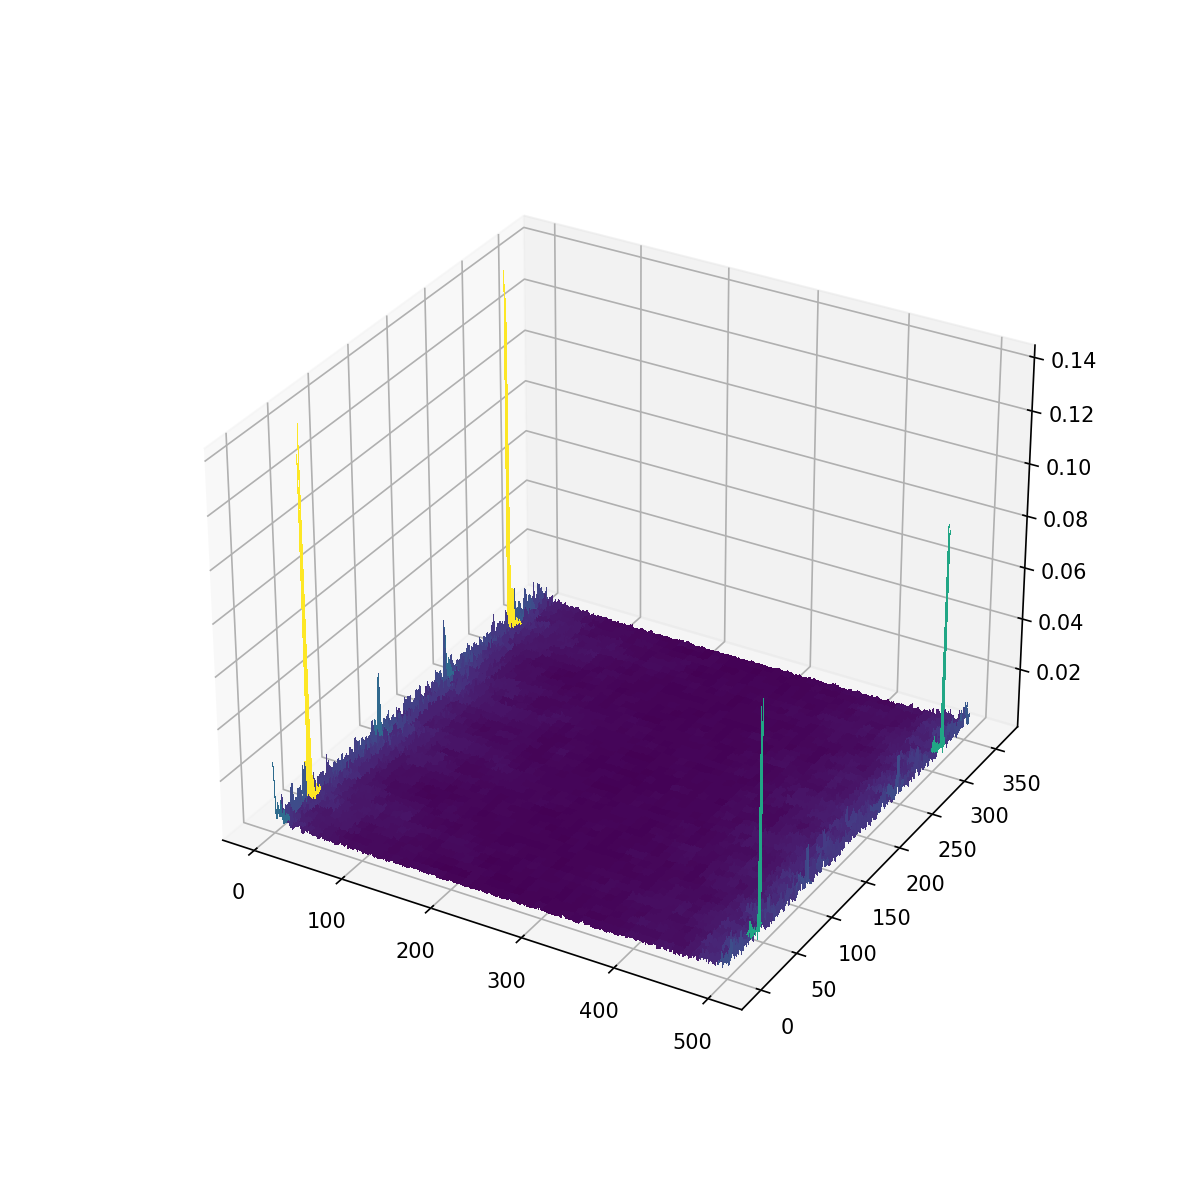

In [53]:
C_fourier = A1_F_p_F*A2_F_p_F_cc
C_norm = (C_fourier)/(np.abs(A1_F_p_F*A2_F_p_F))
C = np.fft.ifft2(C_norm)
#plt.figure(num=None, figsize=(8, 8), dpi=80)
#plt.imshow(np.abs(C),cmap='gray')
print(np.max(np.abs(C)))
print(np.where(np.abs(C) == np.max(np.abs(C))))
print(np.abs(C))

elevation_map = sobel(np.abs(C))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

m, n=elevation_map.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, elevation_map, cmap=cm.viridis, antialiased=False)
ax.axis("on")
#ax.set_facecolor('black')
plt.show()

